# Practice Case 02 - EDA Use Case

Done and analyzed by: *__Mike Bratanata__*
<br>
The data set can be found [here](https://drive.google.com/drive/folders/1nJ70bQb6_7yurTvlzzwNpgQJQmTMjs7R?usp=sharing).

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt

import seaborn as sns

import copy

## Data Overview

*__Chapter 0: Importing data__*

In [2]:
bank = pd.read_csv('D:/Data Science Bootcamp/Day 7/bank/bank-marketing-full.csv', delimiter = ';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


*__Chapter 1.1.: Checking data types__*

In [4]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

*__Chapter 1.2.: Differentiating variables into numerical and categorical__*

In [5]:
numerical_data = bank.select_dtypes(include = [np.number]).columns
categorical_data = bank.select_dtypes(exclude = [np.number]).columns

In [6]:
numerical_data

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [7]:
categorical_data

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

*__Chapter 1.3.: Checking if data has duplicates__*

In [8]:
bank_mod = bank.drop_duplicates()

*__Chapter 1.4.: Counting how many rows and columns__*

In [9]:
bank.shape

(41188, 21)

There are 41,188 rows and 21 columns.

In [10]:
bank_mod.shape

(41176, 21)

There are 41,176 rows and 21 columns.

*__There were 12 duplicates found from the dataset. 
<br> However, since there was no unique ID for each customer. We will keep those 12 observations due to bias information.__*

*__Chapter 1.5.: Checking missing values__*

In [11]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values on each column.

## Exploratory Data Analysis

*__Chapter 2.1.: Creating dummy variables (for further analysis)__*

In [38]:
# Create a set of dummy variables from the contact variable
dummy = pd.get_dummies(bank['contact'])

In [39]:
# Join the dummy variables to the main dataframe 'bank'
bank1 = pd.concat([bank, dummy], axis=1)
bank1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,cellular,telephone
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Age < 60,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Age < 60,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Age < 40,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Age < 40,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Age < 60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Age > 60,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Age < 50,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Age < 60,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Age < 50,1,0


*__Chapter 2.2.: Creating bins for age and duration category__*

In [106]:
bank.loc[bank.age.between(0, 21), 'age_bin'] = 'Age < 21'
bank.loc[bank.age.between(22, 30), 'age_bin'] = 'Age < 30'
bank.loc[bank.age.between(31, 35), 'age_bin'] = 'Age < 35'
bank.loc[bank.age.between(36, 40), 'age_bin'] = 'Age < 40'
bank.loc[bank.age.between(41, 50), 'age_bin'] = 'Age < 50'
bank.loc[bank.age.between(51, 60), 'age_bin'] = 'Age < 60'
bank.loc[bank.age.between(61, np.Inf), 'age_bin'] = 'Age > 60'

In [107]:
bank['age_bin'].value_counts()

Age < 50    10240
Age < 35     9130
Age < 40     7255
Age < 30     7141
Age < 60     6270
Age > 60      910
Age < 21      242
Name: age_bin, dtype: int64

In [108]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [121]:
bank.loc[bank.duration.between(0, 60), 'dur_bin'] = '~ 1 minute'
bank.loc[bank.duration.between(61, 120), 'dur_bin'] = '~ 2 minute'
bank.loc[bank.duration.between(121, 180), 'dur_bin'] = '~ 3 minute'
bank.loc[bank.duration.between(181, 240), 'dur_bin'] = '~ 4 minute'
bank.loc[bank.duration.between(241, 300), 'dur_bin'] = '~ 5 minute'
bank.loc[bank.duration.between(301, 600), 'dur_bin'] = '6 - 10 minute'
bank.loc[bank.duration.between(601, 1200), 'dur_bin'] = '11 - 20 minute'
bank.loc[bank.duration.between(1201, 1800), 'dur_bin'] = '21 - 30 minute'
bank.loc[bank.duration.between(1801, np.Inf), 'dur_bin'] = '> 30 minute'

In [122]:
bank['dur_bin'].value_counts()

~ 2 minute        8631
~ 3 minute        7788
6 - 10 minute     7740
~ 4 minute        5475
~ 1 minute        4286
~ 5 minute        3804
11 - 20 minute    2951
21 - 30 minute     412
> 30 minute        101
Name: dur_bin, dtype: int64

*__Chapter 2.3a.: Copying the original dataset 'bank' to 'bank_mod' using copy function__*

In [123]:
bank_mod = copy.deepcopy(bank)

*__Chapter 2.3b.: Changing categorical variables into numerical variables__*

In [124]:
bank_mod['age_bin'] = bank_mod.age_bin.map({'Age < 21':1,
                                            'Age < 30':2,
                                            'Age < 35':3,
                                            'Age < 40':4,
                                            'Age < 50':5,
                                            'Age < 60':6,
                                            'Age > 60':7})
bank_mod['dur_bin'] = bank_mod.dur_bin.map({'~ 1 minute':1,
                                            '~ 2 minute':2,
                                            '~ 3 minute':3,
                                            '~ 4 minute':4,
                                            '~ 5 minute':5,
                                            '6 - 10 minute':6,
                                            '11 - 20 minute':7,
                                            '21 - 30 minute':8,
                                            '> 30 minute':9})
bank_mod['job'] = bank_mod.job.map({'admin.':1,
                                    'blue-collar':2,
                                    'entrepreneur':3,
                                    'housemaid':4,
                                    'management':5,
                                    'retired':6,
                                    'self-employed':7,
                                    'services':8,
                                    'student':9,
                                    'technician':10,
                                    'unemployed':11,
                                    'unknown':12})
bank_mod['marital'] = bank_mod.marital.map({'divorced':1,
                                            'married':2,
                                            'single':3,
                                            'unknown':4})
bank_mod['education'] = bank_mod.education.map({'basic.4y':1,
                                                'basic.6y':2,
                                                'basic.9y':3,
                                                'high.school':4,
                                                'illiterate':5,
                                                'professional.course':6,
                                                'university.degree':7,
                                                'unknown':8})
bank_mod['default'] = bank_mod.default.map({'no':1,
                                            'yes':2,
                                            'unknown':3})
bank_mod['housing'] = bank_mod.housing.map({'no':1,
                                            'yes':2,
                                            'unknown':3})
bank_mod['loan'] = bank_mod.loan.map({'no':1,
                                      'yes':2,
                                      'unknown':3})
bank_mod['contact'] = bank_mod.contact.map({'cellular':1,
                                            'telephone':2})
bank_mod['poutcome'] = bank_mod.poutcome.map({'failure':1,
                                            'nonexistent':2,
                                            'success':3})
bank_mod['y'] = bank_mod.y.map({'yes':1,
                                'no':0})
# bank_mod['month'] = bank_mod.month.map({'jan':1,
#                                         'feb':2,
#                                         'mar':3,
#                                         'apr':4,
#                                         'may':5,
#                                         'jun':6,
#                                         'jul':7,
#                                         'aug':8,
#                                         'sep':9,
#                                         'oct':10,
#                                         'nov':11,
#                                         'dec':12})

In [125]:
bank_mod['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [126]:
bank_mod.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,dur_bin
0,56,4,2,1,1,1,1,2,may,mon,...,0,2,1.1,93.994,-36.4,4.857,5191.0,0,6,5
1,57,8,2,4,3,1,1,2,may,mon,...,0,2,1.1,93.994,-36.4,4.857,5191.0,0,6,3
2,37,8,2,4,1,2,1,2,may,mon,...,0,2,1.1,93.994,-36.4,4.857,5191.0,0,4,4
3,40,1,2,2,1,1,1,2,may,mon,...,0,2,1.1,93.994,-36.4,4.857,5191.0,0,4,3
4,56,8,2,4,1,1,2,2,may,mon,...,0,2,1.1,93.994,-36.4,4.857,5191.0,0,6,6


*__Chapter 2.4.: Calculating the correlation matrix and plotting the heatmap from bank_mod__*

In [127]:
def heatMap(bank):
    #Create Correlation 'bank'
    corr = bank_mod.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    #Generate Color Map
    colormap = sns.diverging_palette(250, 40, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

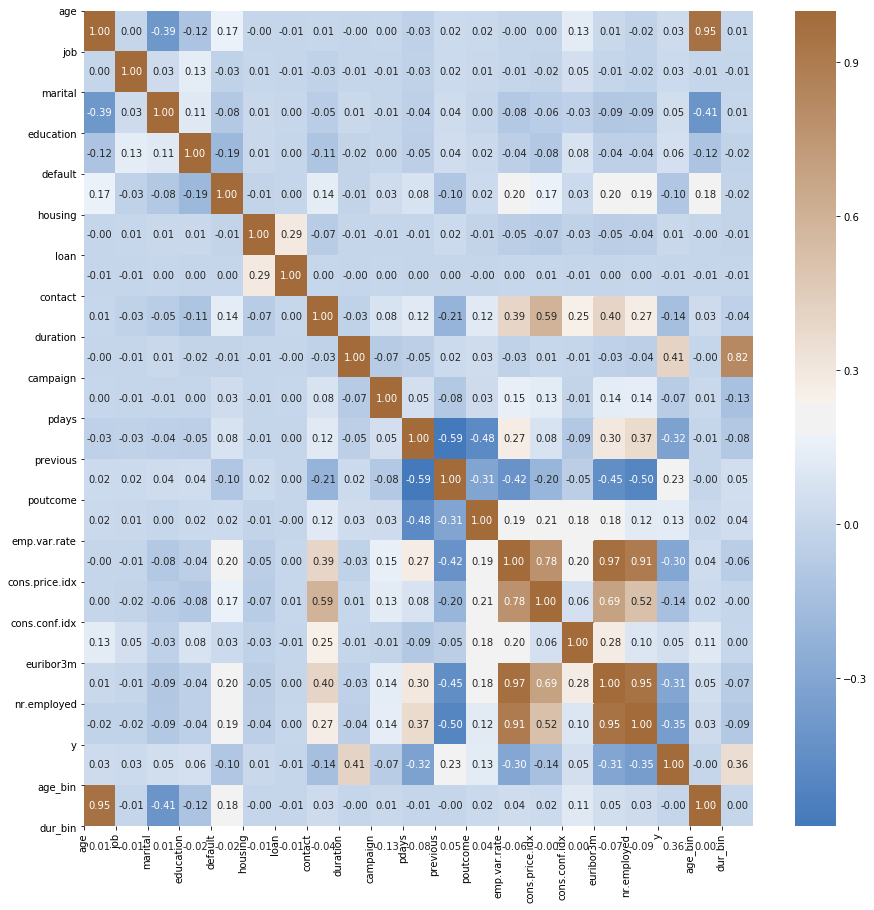

In [128]:
heatMap(bank_mod)

## Visualizations

*__Chapter 3.1.: Histogram__*

In [129]:
# To show age distributions

In [130]:
fig = px.histogram(bank[['age']], x='age', nbins = 20)
fig.show()

*__Chapter 3.2.: Pie Chart__*

In [131]:
# To show education distributions

In [132]:
x1 = bank['education'].value_counts().reset_index()

fig= go.Figure(data=[go.Pie(labels=x1['index'].values, \
                            values=x1.education.values)])
fig.show()

*__Chapter 3.3.: Bar Chart__*

In [133]:
# To show job distributions over default

In [134]:
bank.groupby(['job','default']).size().reset_index()

,job,default,0
0,admin.,no,9129
1,admin.,unknown,1293
2,blue-collar,no,6088
3,blue-collar,unknown,3166
4,entrepreneur,no,1155
5,entrepreneur,unknown,301
6,housemaid,no,741
7,housemaid,unknown,319
8,management,no,2466
9,management,unknown,458


In [135]:
fig = px.bar(bank.groupby(['job','default']).size().reset_index(), x='job', y=0, color='default')
fig.show()

In [136]:
bank.groupby(['y', 'dur_bin']).size().reset_index()

,y,dur_bin,0
0,no,11 - 20 minute,1588
1,no,21 - 30 minute,151
2,no,6 - 10 minute,6302
3,no,> 30 minute,41
4,no,~ 1 minute,4285
5,no,~ 2 minute,8466
6,no,~ 3 minute,7390
7,no,~ 4 minute,4987
8,no,~ 5 minute,3338
9,yes,11 - 20 minute,1363


In [137]:
fig = px.bar(bank.groupby(['y', 'dur_bin']).size().reset_index(), x='y', y=0, color='dur_bin')
fig.show()

In [145]:
x = bank.groupby(['y', 'default']).size().reset_index()
x1 = x.groupby(['y'])[0].sum().reset_index()

x = x.merge(x1, how='left', on = 'y')
x['perc'] = np.round(x['0_x']/x['0_y']*100, 2)
x.head()

,y,default,0_x,0_y,perc
0,no,no,28391,36548,77.68
1,no,unknown,8154,36548,22.31
2,no,yes,3,36548,0.01
3,yes,no,4197,4640,90.45
4,yes,unknown,443,4640,9.55


In [138]:
fig = px.bar(bank.groupby(['y', 'default']).size().reset_index(), x='y', y=0, color='default')
fig.show()

In [147]:
x = bank.groupby(['y', 'loan']).size().reset_index()
x1 = x.groupby(['y'])[0].sum().reset_index()

x = x.merge(x1, how='left', on = 'y')
x['perc'] = np.round(x['0_x']/x['0_y']*100, 2)
x.head()

,y,loan,0_x,0_y,perc
0,no,no,30100,36548,82.36
1,no,unknown,883,36548,2.42
2,no,yes,5565,36548,15.23
3,yes,no,3850,4640,82.97
4,yes,unknown,107,4640,2.31


In [140]:
fig = px.bar(bank.groupby(['y', 'loan']).size().reset_index(), x='y', y=0, color='loan')
fig.show()

*__Chapter 3.4.: Box Plot__*

In [59]:
fig = px.box(bank[['y', 'duration']], y='duration', x='y')
fig.show()

In [72]:
bank[(bank['y']=='yes') & (bank['duration'] <= 1472)]['age'].count()

4502

In [73]:
bank[(bank['y']=='no') & (bank['duration'] <= 555)]['age'].count()

34369

Questions and Answers:
1. Describe each columns (data types, unique values/range of values, missing values, etc.)
<br> *__Explained above in Chapter 1.1. to 1.5.__*
2. Is the data fit for analysis? If not, what wrangling steps should be done?
<br> *__It really depends on the analysis need. For this case, I prepared some data wrangling such as changing categorical variables into numerical (for correlation purposes), creating bins for some variables and also creating dummy variables (for further analysis) that might be used for analaysis. (Chapter 2.1. to 2.3.)__*
3. From the data, what can you describe about their sample of customers?
<br> *__There is actually a lot to be analyzed/described, but based on y variable (which is the target), there are a lot of clients who do not have term deposits. (Please refer to the bar chart on Chapter 3.3.)__*
4. Are they potentially “lucrative” customers? If so, how many of them are and why?
<br> *__Based on the box plot (Chapter 3.4.), there are actually more potential customers that can be beneficial to the company. The box in the 'yes' for clients who have term deposits are bigger than the 'no'. There are about 4,500 lucrative clients.__*
5. What are the difference between customers who are interested in the product and those who don’t?
<br> *__In my observation, customers who are interested in the product will spend more time in the phone calls compared to customers who are not insterested. We can see from customers who have term deposits, the top 2 category for duration is customers with duration range 6 to 10 minutes and 11 - 20 minutes. Based on the 'default' variable, there are apparantly no customers who own term deposit and is default. Howeever, after further analysis, the 'default' variable is not reliable due to the imbalanced proportion (small number of default 'yes'). Last but not least, based on 'loan' variable, there are also no customers who own term deposit and have loans.__*

In [146]:
bank['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64